# Заглянем глубже: наивная байесовская классификация

**Наивные байесвоские модели** - группа исключительно быстрых и простых алгоритмов *классификации*, зачастую подходящих для наборов *данных очень высоких размерностей*. 

В силу их быстроты и небольшого кол-ва настраиваемых параметров они оказываются очень удобны в качестве грубого эталона для задач классификации.

## Байесовская классификация

**Наивные байесвоские классификаторы** основаны на байесовских методах классификации, в основе которых лежит **теорема Байеса** - уравнение, описывающее связь условных вероятностей статистических величин.

В байесовской классификации нас интересует **поиск вероятности метки (категории)** при определенных заданных признаках, являющихся результатами наблюдений/экспериментов, **обозначенной P(L | признаков)**.

Теоремма Байеса позволяет выразить это в терминах величин, которые мы можем вычислить напрямую:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

Один из способов выбора м/у двумя метками ($L_1$ и $L_2$) - вычислить отношение апостериорных вероятностей для каждой ищ них:

**Апостерио́рная вероя́тность** — условная вероятность случайного события при условии того, что известны апостериорные данные, то есть полученные после опыта.

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$


-------------------------------------------------------------------------------------------------------------------------------

https://habr.com/ru/company/otus/blog/473468/

Разберем формулу

Давайте еще раз посмотрим на формулу:

- P(A|B) = P(B|A) * P(A)/P(B)

Здесь:

- P(A|B) – вероятность наступления события А, при условии, что событие В уже случилось;
- P(B|A) – вероятность наступления события В, при условии, что событие А уже случилось. Сейчас это выглядит как какой-то замкнутый круг, но мы скоро поймем, почему формула работает;
- P(A) – априорная (безусловная) вероятность наступления события А;
- P(B) – априорная (безусловная) вероятность наступления события В.

**P(A|B) – это пример апостериорной (условной) вероятности, то есть такой, которая измеряет вероятность какого-то определенного состояния окружающего мира (а именно состояния, при котором произошло событие В).**

**Тогда как P(A) – это пример априорной вероятности, которая может быть измерена при любом состоянии окружающего мира.**

Давайте посмотрим на теорему Байеса в действии на примере. Предположим, что недавно вы закончили курс по анализу данных от bootcamp. Вы еще не получили ответа от некоторых компаний, в которых вы проходили собеседование, и начинаете волноваться. Итак, вы хотите рассчитать вероятность того, что конкретная компания сделает вам предложение об устройстве на работу, при условии, что уже прошло три дня, а они вам так и не перезвонили.

Перепишем формулу в терминах нашего примера. В данном случае, исход А (Offer) – это получения предложения о работе, а исход В (NoCall) – «отсутствие телефонного звонка в течение трех дней». Исходя из этого, нашу формулу можно переписать так:

P(Offer|NoCall) = P(NoCall|Offer) * P(Offer) / P(NoCall)

Значение P(Offer|NoCall) — **это вероятность получения предложения при условии, что звонка нет в течение трех дней**. Эту вероятность оценить крайне сложно.

Однако обратной вероятности, P(NoCall|Offer), то есть **отсутствию телефонного звонка в течение трех дней, при учете, что в итоге вы получили предложение о работе от компании**, вполне можно привязать какое-то значение. Из разговоров с друзьями, рекрутерами и консультантами вы узнаете, что эта вероятность небольшая, но иногда компания все же может сохранять тишину в течение трех дней, если она все еще планирует пригласить вас на работу. Итак, вы оцениваете:

P(NoCall|Offer) = 40%

40% — это неплохо и кажется, еще есть надежда! Но мы еще не закончили. Теперь нам нужно оценить P(Offer), вероятность выхода на работу. Все знают, что поиск работы – это долгий и трудный процесс, и возможно вам придется проходить собеседование несколько раз, прежде чем вы получите это предложение, поэтому вы оцениваете:

P(Offer) = 20%

Теперь нам осталось оценить P(NoCall), вероятность, что вы не получите звонок от компании в течение трех дней. Существует множество причин, по которым вам могут не перезвонить в течение трех дней – они могут отклонить вашу кандидатуру или до сих пор проводить собеседования с другими кандидатами, или рекрутер просто заболел и поэтому не звонит. Что ж, есть множество причин, по которым вам могли не позвонить, так что эту вероятность вы оцениваете как:

P(NoCall) = 90%

А теперь собрав это все вместе, мы можем рассчитать P(Offer|NoCall):

P(Offer|NoCall) = 40% * 20%/90% = 8.9%

Это довольно мало, так что, к сожалению, рациональнее оставить надежду на эту компанию (и продолжать отправлять резюме в другие). Если это все еще кажется немного абстрактным, не переживайте. Я чувствовал то же самое, когда впервые узнал про теорему Байеса.

-------------------------------------------------------------------------------------------------------------------------------


Всё, что нам теперь нужно - модель, с помощью которой можно было бы вычислить $P({\rm признаков}~|~L_i)$ для каждой из меток.

Подобная модель называется **порождающей моделью (generative model)**, поскольку определяет гипотетический случайный процесс генерации данных.

**Задание порождающей модели** для каждой из **меток/категорий** - основа обучения подобного байесовского классификатора.

Обобщенная версия подобного шага обучения - непростая задача, но её можно упростить, приняв некоторые допущения о виде модели. Именно на этом этапе возникает слово **наивный** в названии **Наивный байесвоский классификатор**: сделав очень **наивное** допущение относительно порождающей модели для каждой из **меток/категорий**, можно будет отыскать грубое приближение порождающей модели для каждого класса, после чего перейти к байесовской классификации.

Различные виды наивных байесовских классификаторов основываются на различных *наивных* допущениях относительно данных. Мы рассмотрим некоторые из них.

$L_i$ - метка.

Мы ищем вероятность наличия признака, при условии, что поставлена метка $L_i$.

**модель, с помощью которой можно было бы вычислить  𝑃(признаков | 𝐿𝑖) для каждой из меток.**

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

## Гауссов наивный байесовский классификатор

Вероятно самый простой из Наивных байесвоских классификаторов - Гауссов.

В этом классификаторе допущение состоит в том, что *данные всех категорий взяты из простого нормального распределения*.

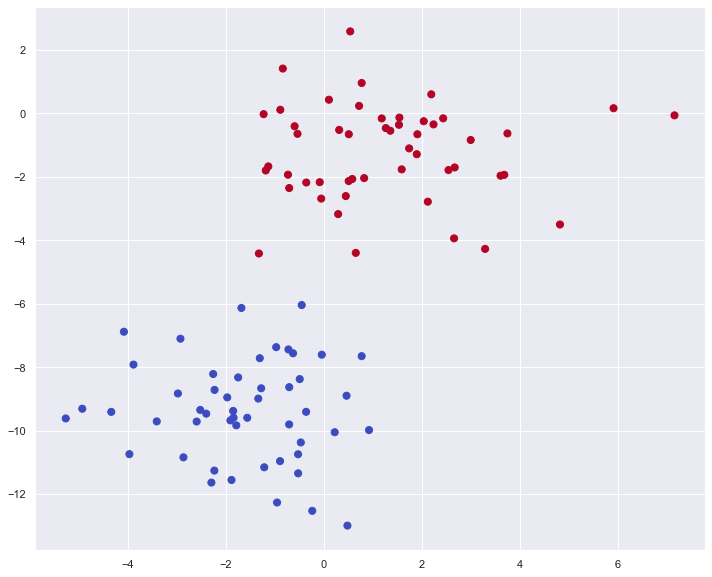

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

# где X[:,0] и X[:,1] - координаты по осям
# y - метки (целевой вектор, содержащий 2 состояния 1 и 0)
# s - размер точек

Один из самых быстрых способов создания простой модели - допущение о том, что данные подчиняются нормальному распределению без ковариации между измерениями.

-------------------------------------------------------------------------------------------------------------------------------

https://ru.wikipedia.org/wiki/Ковариация

Ковариа́ция или корреляционный момент cov(X,Y) случайных величин — в теории вероятностей и математической статистике мера зависимости двух случайных величин.

В теории вероятностей и статистике ковариация является мерой совместной изменчивости двух случайных величин. Если большие значения одной переменной в основном соответствуют большим значениям другой переменной, и то же самое верно для меньших значений (то есть переменные имеют тенденцию демонстрировать одинаковое поведение), ковариация положительна.В противоположном случае, когда большие значения одной переменной в основном соответствуют меньшим значениям другой (т. е. переменные имеют тенденцию показывать противоположное поведение), ковариация отрицательна. Таким образом, знак ковариации показывает тенденцию линейной зависимости между переменными. Величину ковариации нелегко интерпретировать, поскольку она не нормирована и, следовательно, зависит от величин переменных. Однако нормализованная версия ковариации, коэффициент корреляции, своей величиной показывает силу линейной зависимости.

-------------------------------------------------------------------------------------------------------------------------------

Для обучения этой модели достаточно найти среднее значение (стат. мат ожидание) и стандартное отклонение точек внутри каждой из категорий.

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

Эллипсы на рисунке ниже представляют Гауссову порождающую модель, для каждой из меток, с ростом вероятности по мере приближения к центру элипса. 

С помощью этой порождающей модели для каждого класса мы можем вычислить вероятность **𝑃(признаков | 𝐿𝑖)** для каждой точки жанных, а следовательно, быстро рассчитать соотношение для апостриорной вероятности и определить, какая из меток с большей вероятностью соответствует конкретной точке.

![(run code in Appendix to generate image)](PythonDataScienceHandbook-2/notebooks_v2/figures/05.05-gaussian-NB.png)

Сгенерируем данные для предсказания (проверки):

In [5]:
rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)
X_new

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       ...,
       [-4.32134532, -7.70649139],
       [ 0.08823081,  0.94005305],
       [ 7.05928655, -8.44990818]])

In [6]:
y_new = model.predict(X_new)
y_new

array([1, 1, 1, ..., 0, 1, 1])

Теперь у нас есть возможность построить график по этим данным, и понять, где пролегает **граница принятия решений (decision boundary)**:

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

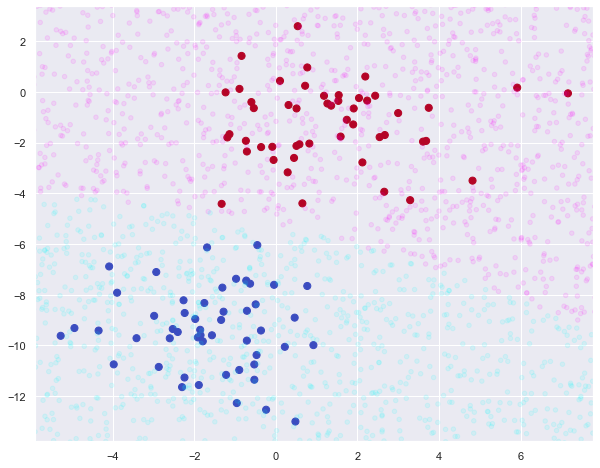

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
lim = plt.axis()
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=20, cmap='cool', alpha=0.1)
plt.axis(lim)

Мы видим, что граница слегка изогнута. Граница при наивном Гауссовом байесовском классификаторе соответствует кривой второго порядка.

Положительная сторона этого байесовского формального представления заключается в возможности естественной вероятностной классификации, рассчитать котороую можно с помощью метода ``predict_proba``:

In [8]:
y_prob = model.predict_proba(X_new)
y_prob

array([[9.25897220e-08, 9.99999907e-01],
       [8.05934584e-04, 9.99194065e-01],
       [5.95247683e-05, 9.99940475e-01],
       ...,
       [9.99994010e-01, 5.99039932e-06],
       [1.01364165e-09, 9.99999999e-01],
       [1.53083494e-01, 8.46916506e-01]])

In [9]:
y_prob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Столбцы отражают **апостериорные вероятности первой и второй меток соответственно**. 

Подобные байесовские методы могут оказаться весьма удобным подходом **при необходимости получения оценок погрешностей** в классификации.

## Полиномиальный наивный байесовский классификатор

Гауссово допущение - далеко не единственное допущение, которое можно использовать для описания **порождающего распределения** для всех меток.

Еще один пример - полиномиальный наивный байесовский классификатор с допущением, что признаки сгенерированы на основе **простого полиномиального распределения**.

Полиномиальные распределения описывают **вероятность наблюдения количеств вхождений в несколько категорий**, таким образом этот классификатор лучше всего подходит **для признаков, отражающих количество или частоту вхождений**.

Мы моделируем распределение данных с оптимальным полиномиальным распределением.

##### Пример: Классификация текста.

Полиномиальный наивный байесовский классификатор нередко используют для классификации текста, где признаки соответствуют кол-ву слов или частотам их употребления в классифицируемых документах.

In [11]:
from sklearn.datasets import fetch_20newsgroups

In [12]:
data = fetch_20newsgroups()

In [13]:
data

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [14]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
categories = ['talk.religion.misc', 
              'soc.religion.christian',
              'sci.space', 
              'comp.graphics']

In [17]:
train = fetch_20newsgroups(subset='train', categories=categories) # 
test = fetch_20newsgroups(subset='test', categories=categories)   # 

In [18]:
train

{'data': ["From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christian trait\nOrganization: Motorola LPA Development\nLines: 26\n\nIn article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com\n(jcj) wrote:\n\n> I'd like to remind people of the withering of the fig tree and Jesus\n> driving the money changers et. al. out of the temple.  I think those\n> were two instances of Christ showing anger (as part of His human side).\n> \nYes, and what about Paul saying:\n\n26 Be ye angry, and sin not: let not the sun go down upon your wrath:\n(Ephesians 4:26).\n\nObviously then, we can be angry w/o sinning.\n\nJon\n\n------------------------------------------------\nJon Ogden         - jono@mac-ak-24.rtsg.mot.com\nMotorola Cellular - Advanced Products Division\nVoice: 708-632-2521      Data: 708-632-6086\n------------------------------------------------\n\nThey drew a circle and shut him out.\nHeretic, Rebel, a thing to flout.\nBut Love and I h

In [19]:
test

{'data': ['From: livesey@solntze.wpd.sgi.com (Jon Livesey)\nSubject: Re: After 2000 years, can we say that Christian Morality is\nOrganization: sgi\nLines: 51\nDistribution: world\nNNTP-Posting-Host: solntze.wpd.sgi.com\n\nIn article <1r3570$hkv@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n|> In article <1r2ls3$8mo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n|> #|> \n|> #|> #This is quite different from saying "Employing force on other people\n|> #|> #is immoral, period.   Unfortunately, from time to time we are obliged\n|> #|> #to do this immoral thing for reasons of self-preservation, and so\n|> #|> #we have to bear the moral consequences of that.\n|> #|> \n|> #|> Since both statements, to all intents and purposes, say effectively\n|> #|> the same thing, \n|> #\n|> #Are you serious?  Two statements, one of which says that use of force\n|> #in the given situation is moral, and the other of which says it is\n|> #not moral "say effectivel

In [20]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [21]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



###### Для того, чтоб использовать эти данные для машинного обучения, необходимо преобразовать содержимое каждой строки в числовой вектор.
Для этого воспользуемся векторизатором **TF-IDF** и создадим конвейер, присоединяющий его последовательно к полиномиальному наивному байесовскому классификатору:

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [24]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# с помощью этого конвейера мы можем применить модель к обучающей последовательности и предсказать метки для контрольных данных

In [25]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [29]:
labels = model.predict(test.data)

In [30]:
label

array([2, 0, 1, ..., 1, 2, 1], dtype=int64)

Осуществим проверку:

In [28]:
from sklearn.metrics import confusion_matrix

Text(89.133125, 0.5, 'predicted label')

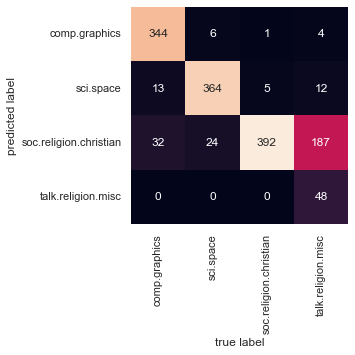

In [34]:
mat = confusion_matrix(test.target, labels)
# plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, 
            square=True, 
            annot=True, 
            fmt='d',
            cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names,
            )

plt.xlabel('true label')
plt.ylabel('predicted label')

Text(128.01312499999997, 0.5, 'predicted label')

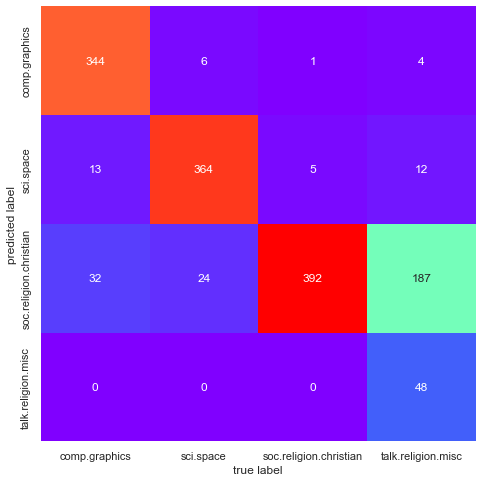

In [39]:
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, 
            square=True, 
            annot=True, 
            fmt='d',
            cbar=False,
            xticklabels=train.target_names,
            yticklabels=train.target_names,
            cmap='rainbow'
            )

plt.xlabel('true label')
plt.ylabel('predicted label')

In [40]:
# sns.heatmap?
# sns.heatmap(
#     data,
#     *,
#     vmin=None,
#     vmax=None,
#     cmap=None,
#     center=None,
#     robust=False,
#     annot=None,
#     fmt='.2g',
#     annot_kws=None,
#     linewidths=0,
#     linecolor='white',
#     cbar=True,
#     cbar_kws=None,
#     cbar_ax=None,
#     square=False,
#     xticklabels='auto',
#     yticklabels='auto',
#     mask=None,
#     ax=None,
#     **kwargs,
# )

###### Ф-ия возвращающиа предсказание для отдельной строки:

In [41]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Попробуем ее в деле:

In [42]:
predict_category('sending a payload to the ISS')

'sci.space'

In [43]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [44]:
predict_category('determining the screen resolution')

'comp.graphics'

### Когда имеет смысл использовать наивный байесовский классификатор

- когда данные действительно соответствуют наивным допущениям (встречается в реальности редко)
- для очень хорошо разделяемых категорий, когда сложность модели не так важна
- для данных с очень большим числом измерений, когда сложность модели не так важна

С ростом числа измерений, близость данных означает близость по всем измерениям, и как следствие с ростом числа измерений вероятность близости любых двух точек падает, тоесть кластеры становятся всё более изолированы друг от друга. И как следствие наивные байесовкие классификаторы показывают все более лучший результат.